In [1]:
%load_ext autoreload
%autoreload 2

In [15]:
import matplotlib.pyplot as plt
import time
import numpy as np
import query_db
import composite
import spectral_analysis as sa
import composite
import datafidelity as df
import copy

In [9]:
query = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= -1 and phase < 1 and ((dm15_cfa >= .9 and dm15_cfa < 1.2) or (dm15_from_fits >= .9 and dm15_from_fits < 1.2))"]

In [10]:
composites, sn_arrays, boot_sn_arrays = query_db.main(1, query, boot='nb', medmean=1)

SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= -1 and phase < 1 and ((dm15_cfa >= .9 and dm15_cfa < 1.2) or (dm15_from_fits >= .9 and dm15_from_fits < 1.2))
48 spectra found
151 questionable files currently ignored
5 questionable spectra removed 43 spectra left
1 Peculiar Ias removed 42 spectra left
36 SNs with host corrections
Arrays cleaned
151 questionable files currently ignored
1 spectra with nan ivars removed 35 spectra left
1998dk sn1998dk-19980831-ui.flm 70.6132013702 1.05 None -0.54 bsnip
AV:  0.6158
Host correction...
2001fe sn2001fe-20011115-ui.flm 63.0968901259 1.0 None -0.99 bsnip
AV:  0.1943
Host correction...
2002de sn2002de-20020608.374-ui-corrected.flm 7.9496540894 0.96 None -0.32 bsnip
AV:  0.5574
Host correction...
2005na sn2005na-20060105.335-ui.flm 23.8296042949 1.09 None 0.03 bsnip
AV:  0.2038
Host correction...
2007co sn2007co-20070614.468-ui-corrected.flm 40.524617158 1.16 None 0.85 bsnip
AV:  0.3793
Host 

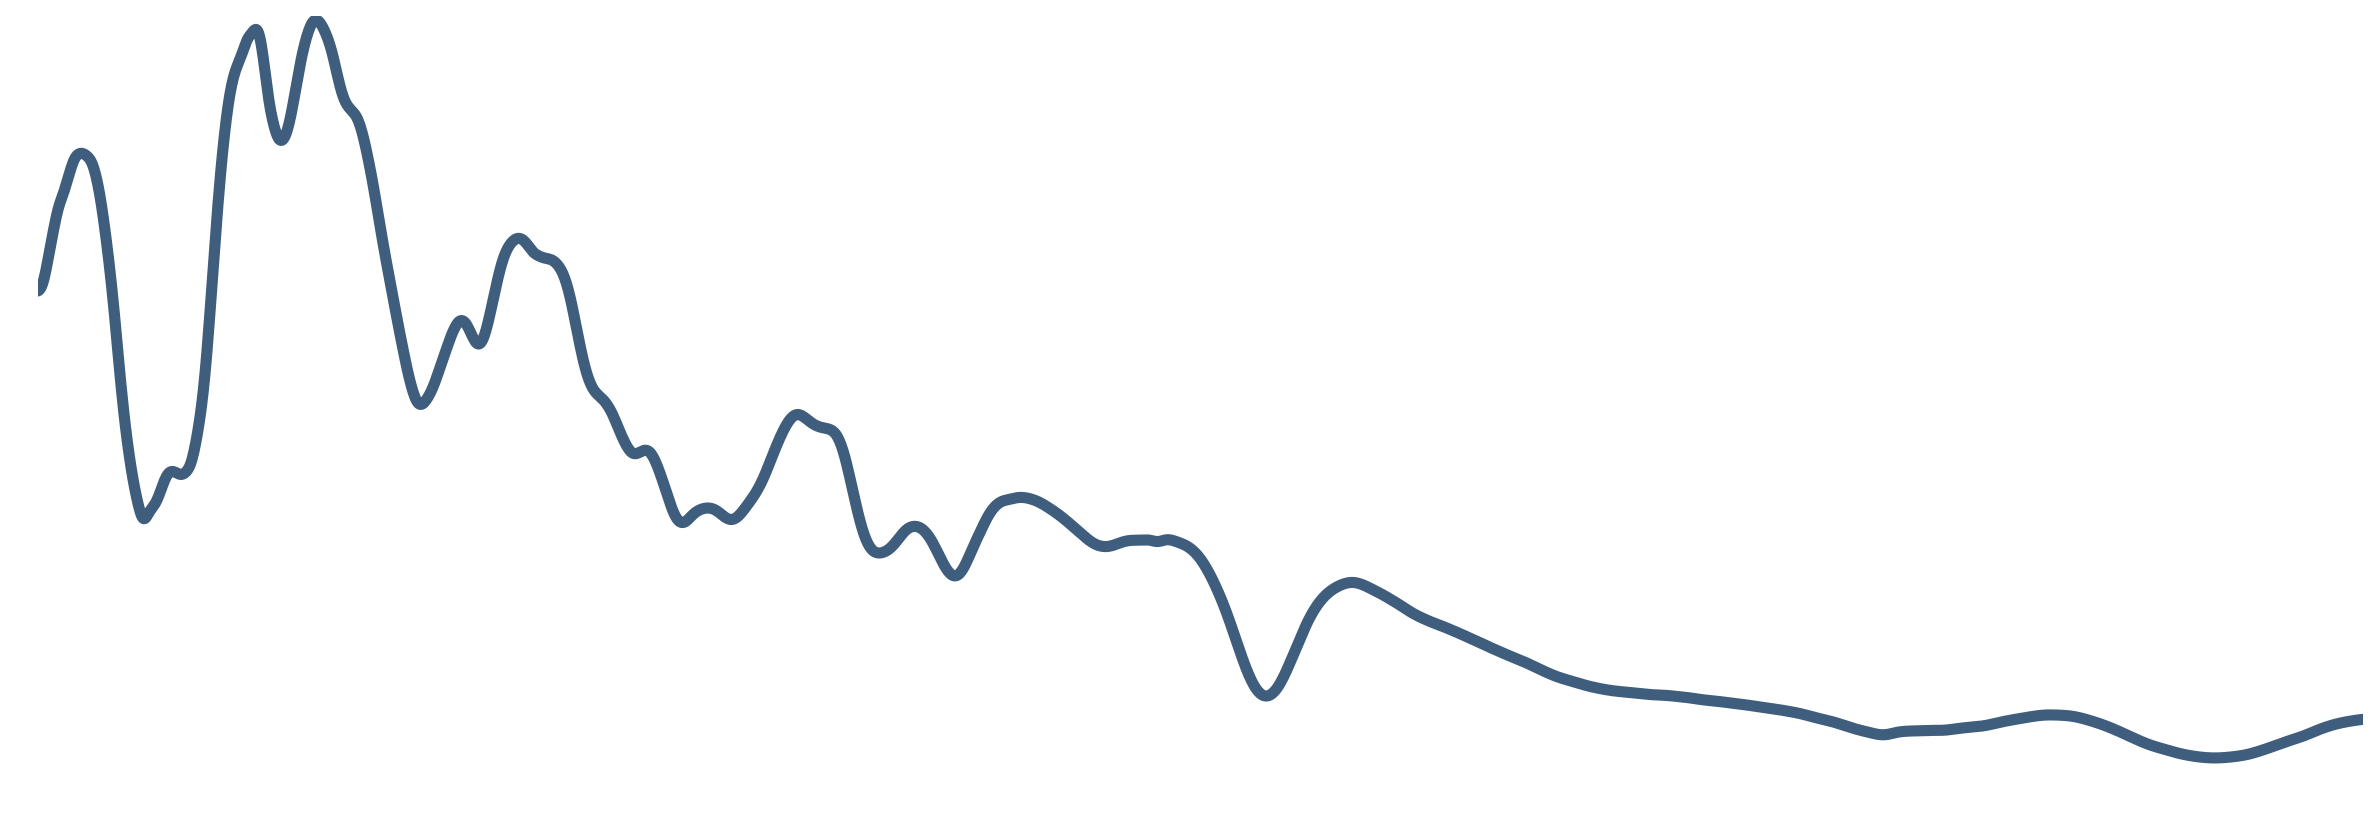

In [34]:
query_db.set_min_num_spec(composites, 5)
comp = composites[0]
sm_comp = copy.copy(comp)
var_y = np.zeros(len(comp.wavelength[comp.x1:comp.x2]))
sm_comp.flux = df.gsmooth(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2], var_y, vexp = .002)
plt.figure (figsize=(30,10)) 
plt.axis('off')
plt.plot(sm_comp.wavelength[sm_comp.x1:sm_comp.x2], sm_comp.flux, linewidth = 8, color = '#3F5D7D')
plt.xlim([3470.,8500.])
plt.savefig('../../FLASH/title_composite.pdf', dpi = 300, bbox_inches = 'tight')
plt.show()